In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
spy=pd.read_csv("data/spy.csv")

In [3]:
spy.rename(columns={'Adj Close':"adj_close"}, inplace=True)

In [7]:
spy.tail()

,Date,Open,High,Low,Close,adj_close,Volume
3771,2020-03-19,239.250000,247.380005,232.220001,240.509995,239.103989,289322000
3772,2020-03-20,242.529999,244.470001,228.500000,228.800003,228.800003,347158800
3773,2020-03-23,228.190002,229.679993,218.259995,222.949997,222.949997,326025200
3774,2020-03-24,234.419998,244.100006,233.800003,243.149994,243.149994,235494500
3775,2020-03-25,244.869995,256.350006,239.750000,246.789993,246.789993,298352300


In [77]:
spy.set_index('Date', inplace=True)

In [71]:
spy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3776 entries, 0 to 3775
Data columns (total 7 columns):
Date         3776 non-null object
Open         3776 non-null float64
High         3776 non-null float64
Low          3776 non-null float64
Close        3776 non-null float64
adj_close    3776 non-null float64
Volume       3776 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 206.6+ KB


In [73]:
spy=spy.astype({'Date': 'datetime64'})

In [79]:
spy.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3776.0,1.748180e+02,6.216607e+01,6.795000e+01,1.269200e+02,1.503050e+02,2.120350e+02,3.377900e+02
High,3776.0,1.757552e+02,6.230755e+01,7.000000e+01,1.275975e+02,1.511750e+02,2.126250e+02,3.390800e+02
Low,3776.0,1.737865e+02,6.200655e+01,6.710000e+01,1.261250e+02,1.491800e+02,2.112475e+02,3.374800e+02
Close,3776.0,1.748298e+02,6.217226e+01,6.811000e+01,1.268275e+02,1.501600e+02,2.122325e+02,3.383400e+02
adj_close,3776.0,1.547432e+02,6.838621e+01,5.418443e+01,9.877749e+01,1.213159e+02,1.946259e+02,3.363621e+02
Volume,3776.0,1.416417e+08,9.886380e+07,1.527000e+07,7.272658e+07,1.115036e+08,1.778020e+08,8.710263e+08


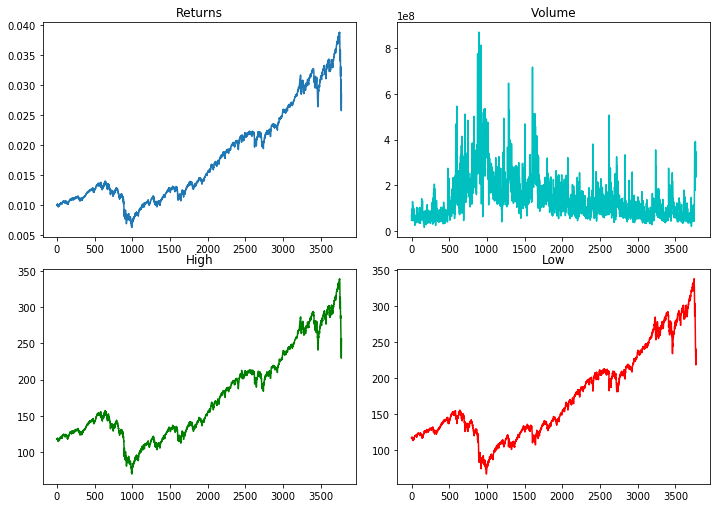

In [46]:
fig, ax = plt.subplots(2,2, figsize=(10,7))
fig.tight_layout()
ax[0][1].plot(spy.Volume, color='c')
ax[0][1].set_title("Volume");

ax[0][0].plot(spy.adj_close/spy.adj_close[0]/100);
ax[0][0].set_title("Returns");

ax[1][1].plot(spy.Low, color='r')
ax[1][1].set_title("Low");

ax[1][0].plot(spy.High, color='g')
ax[1][0].set_title("High");

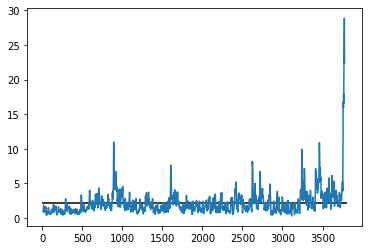

In [19]:
plt.plot(spy.Close.rolling(14).std())
plt.hlines(np.mean(spy.Close.rolling(14).std()),0,3800)

In [28]:
def RSI(series, period=14):
 print(len(series))
 delta = series.diff().dropna()
 u = delta * 0
 d = u.copy()
 u[delta > 0] = delta[delta > 0]
 d[delta < 0] = -delta[delta < 0]
 u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
 u = u.drop(u.index[:(period-1)])
 d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
 d = d.drop(d.index[:(period-1)])
 #rs = pd.stats.moments.ewma(u, com=period-1, adjust=False) / pd.stats.moments.ewma(d, com=period-1, adjust=False)
 rs = pd.Series.ewm(u, com=period-1).mean()/pd.Series.ewm(d, com=period-1).mean()
 return 100 - 100 / (1 + rs)

In [42]:
#spy.Close.rolling(14).apply(RSI, raw=False)
#Graph
#min max, %s 
#fit 14 vs 10
#backtested profitability
np.sum(np.where(RSI(spy.adj_close) <30,1,0))

3776


69

In [57]:
rsi=RSI(spy.adj_close).dropna();

3776


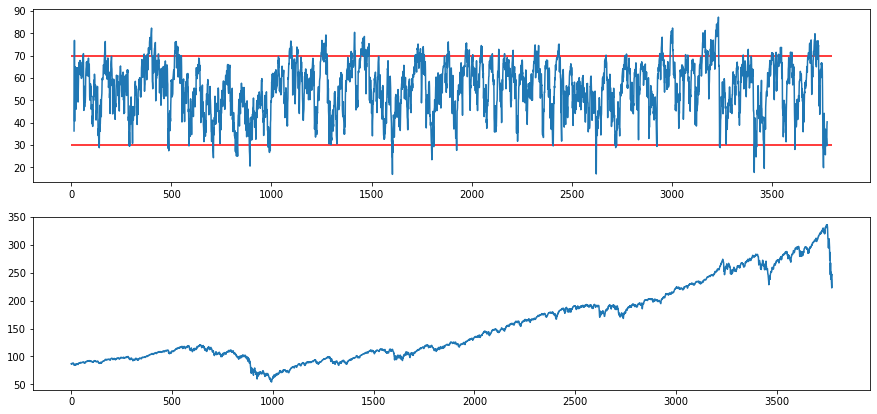

In [60]:
fig, ax= plt.subplots(2,1, figsize=(15,7))
ax[0].plot(rsi)
ax[0].hlines(70,0,3800, color='red')
ax[0].hlines(30,0,3800, color='red')
ax[1].plot(spy.adj_close);

In [72]:
print("Min RSI", np.min(rsi))
print("Max RSI", np.max(rsi))
print("Median RSI", np.median(rsi))
print("Std dev. RSI", np.std(rsi))
print("% of time below 20", np.round(100*np.sum(np.where(rsi<20,1,0))/len(rsi),2))
print("% of time below 30", np.round(100*np.sum(np.where(rsi<30,1,0))/len(rsi),2))
print("% of time above 70", np.round(100*np.sum(np.where(rsi>70,1,0))/len(rsi),2))
print("% of time above 80", np.round(100*np.sum(np.where(rsi>80,1,0))/len(rsi),2))

Min RSI 16.80273123264722
Max RSI 87.19183653342725
Median RSI 56.734013828313536
Std dev. RSI 11.515620141280829
% of time below 20 0.16
% of time below 30 1.83
% of time above 70 8.9
% of time above 80 0.53


In [75]:
rsi.describe()

count    3762.000000
mean       55.500167
std        11.517151
min        16.802731
25%        47.272503
50%        56.734014
75%        64.201823
max        87.191837
Name: adj_close, dtype: float64